In [2]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import imshow
import gdal
import numpy as np

In [8]:
def testFunc(arr):
    return arr.max()

test = np.arange(1,76).reshape(5,5,3)
np.apply_along_axis(testFunc,2, test)

array([[ 3,  6,  9, 12, 15],
       [18, 21, 24, 27, 30],
       [33, 36, 39, 42, 45],
       [48, 51, 54, 57, 60],
       [63, 66, 69, 72, 75]])

In [9]:
study_area = 'mtbarker'

# get the results ready for comparison
# no change should be np.NaN
# chanage = 1
change = gdal.Open('../' + study_area + '/change_time.img').ReadAsArray()
change[change == 0] = np.nan

peterchange = change.copy()
peterchange[np.isfinite(peterchange)] = 1

# mikechange = changedates_arr.copy()
# mikechange[np.isfinite(mikechange)] = 1
results_save_location = '../' + study_area + '/changeresults_svm.pkl'
svc_raw = np.load(results_save_location)
svc_flag = svc_raw.copy()
svc_flag[np.isfinite(svc_flag)] = 1

results_save_location = '../' + study_area + '/changeresults_rf.pkl'
rf_raw = np.load(results_save_location)
rf_flag = rf_raw.copy()
rf_flag[np.isfinite(rf_flag)] = 1

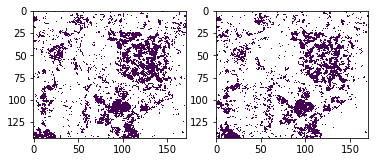

In [10]:
plt.subplot(121)
imshow(rf_flag)
plt.subplot(122)
imshow(svc_flag)

In [11]:
np.nanmean(rf_raw - svc_raw)

-2.1057348

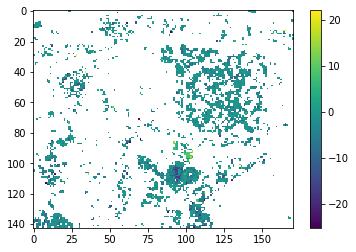

In [13]:
imshow(rf_raw - svc_raw)
plt.colorbar()

In [14]:
import pandas as pd

df = pd.DataFrame({'a': [1,1,2,3,2,4,4,3,2,1,3,4,3,2], 'b':[2,3,4,2,1,3,4,2,1,2,4,2,1,1]})
df

,a,b
0,1,2
1,1,3
2,2,4
3,3,2
4,2,1
5,4,3
6,4,4
7,3,2
8,2,1
9,1,2


In [41]:
df['d'] = df.index // 2
df2 = df.groupby('d').apply(pd.DataFrame.mode)
df2

a    b    c    d
d                      
0 0  1.0  2.0  1.0  0.0
  1  NaN  3.0  NaN  NaN
1 0  2.0  2.0  2.0  1.0
  1  3.0  4.0  NaN  NaN
2 0  2.0  1.0  1.0  2.0
  1  4.0  3.0  3.0  NaN
3 0  3.0  2.0  2.0  3.0
  1  4.0  4.0  4.0  NaN
4 0  1.0  1.0  1.0  4.0
  1  2.0  2.0  NaN  NaN
5 0  3.0  2.0  2.0  5.0
  1  4.0  4.0  3.0  NaN
6 0  2.0  1.0  1.0  6.0
  1  3.0  NaN  NaN  NaN

In [58]:
df3 = df2['b'].unstack(level=-1)
df3cols = list(df3.columns)
df3cols[0] = 'low_mode'
df3.columns = df3cols

df3

,low_mode,1
d,,
0,2.0,3.0
1,2.0,4.0
2,1.0,3.0
3,2.0,4.0
4,1.0,2.0
5,2.0,4.0
6,1.0,NaN


In [59]:
heirarchy = {1: 1, 2: 3, 3: 4, 4:2} # vegetation, earth, water, urban
df3['mode'] = df3['low_mode'].map(heirarchy)
df3

,low_mode,1,mode
d,,,
0,2.0,3.0,3
1,2.0,4.0,3
2,1.0,3.0,1
3,2.0,4.0,3
4,1.0,2.0,1
5,2.0,4.0,3
6,1.0,NaN,1


In [54]:
df

,a,b,c,d
0,1,2,1.0,0
1,1,3,1.0,0
2,2,4,2.0,1
3,3,2,2.0,1
4,2,1,1.0,2
5,4,3,3.0,2
6,4,4,4.0,3
7,3,2,2.0,3
8,2,1,1.0,4
9,1,2,1.0,4


In [57]:
pd.merge(df, df3, how = 'left', left_on='d', right_index = True)
# df2['e'] = df2.applylist(df2.loc[1]['b'])

,a,b,c,d,low_mode,1
0,1,2,1.0,0,2.0,3.0
1,1,3,1.0,0,2.0,3.0
2,2,4,2.0,1,2.0,4.0
3,3,2,2.0,1,2.0,4.0
4,2,1,1.0,2,1.0,3.0
5,4,3,3.0,2,1.0,3.0
6,4,4,4.0,3,2.0,4.0
7,3,2,2.0,3,2.0,4.0
8,2,1,1.0,4,1.0,2.0
9,1,2,1.0,4,1.0,2.0


In [37]:
def getPriority(list):
    heirarchy = {1: 1, 2: 3, 3: 4, 4:2} # vegetation, earth, water, urban
    max_priority = 4
    i_max = 0
for i in mode_arr:
    if heirarchy.index(i) < max_priority:
        max_priority = heirarchy.index(i)
        i_max = i

,a,b,c
d,,,
0,1,3,1.0
1,3,2,2.0
2,2,3,3.0
3,3,2,2.0
4,2,2,1.0
5,3,2,2.0
6,3,1,1.0


In [3]:
import numpy as np
np.array([2,3,4,5]) // 2

array([1, 1, 2, 2])

In [4]:
heirarchy = {1: 1, 2: 4, 3: 2, 4: 3} # class to priority
reversedheirarchy = {1: 1, 2: 3, 3: 4, 4:2} # priority to class

reversedheirarchy = {}
for key in heirarchy.keys():
    reversedheirarchy[heirarchy[key]] = key
 

{1: 1, 2: 4, 3: 2, 4: 3}

In [52]:
import time
i = 0
sys.stdout.write(str(i))
for i in range(100):
#     sys.stdout.flush()
    i += 2
    sys.stdout.write('\b' * len(str(i-1)) + str(i))

023456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101

In [81]:
import numpy as np
import sys

test = 105
for i in range(test):
    time.sleep(0.05)
    pc = i/ test
    barlen = 50
    progress = chr(9608) * int(pc * barlen) + ' ' * int(barlen* (1 - pc))
    string = ' Progress:' + progress + str(int(pc * 100)+1) + '% done     '
    sys.stdout.flush() 
#     print(i, end='\r')
    print('Number: ' + str(i) + string, end='\r')

    


In [58]:
'*' * i+1 + ' ' * (100 - (i+1))

TypeError: must be str, not int

In [67]:
print(chr(9608))

█


In [50]:
import numpy as np
import sys

test = np.arange(1000000)

for i in test:
    i += 1
    sys.stdout.flush()
    sys.stdout.write(str(i))
print('Complete')

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283848586878889909192939495969798991001011021031041051061071081091101111121131141151161171181191201211221231241251261271281291301311321331341351361371381391401411421431441451461471481491501511521531541551561571581591601611621631641651661671681691701711721731741751761771781791801811821831841851861871881891901911921931941951961971981992002012022032042052062072082092102112122132142152162172182192202212222232242252262272282292302312322332342352362372382392402412422432442452462472482492502512522532542552562572582592602612622632642652662672682692702712722732742752762772782792802812822832842852862872882892902912922932942952962972982993003013023033043053063073083093103113123133143153163173183193203213223233243253263273283293303313323333343353363373383393403413423433443453463473483493503513523533543553563573583593603613623633643653663673683693

2326232723282329233023312332233323342335233623372338233923402341234223432344234523462347234823492350235123522353235423552356235723582359236023612362236323642365236623672368236923702371237223732374237523762377237823792380238123822383238423852386238723882389239023912392239323942395239623972398239924002401240224032404240524062407240824092410241124122413241424152416241724182419242024212422242324242425242624272428242924302431243224332434243524362437243824392440244124422443244424452446244724482449245024512452245324542455245624572458245924602461246224632464246524662467246824692470247124722473247424752476247724782479248024812482248324842485248624872488248924902491249224932494249524962497249824992500250125022503250425052506250725082509251025112512251325142515251625172518251925202521252225232524252525262527252825292530253125322533253425352536253725382539254025412542254325442545254625472548254925502551255225532554255525562557255825592560256125622563256425652566256725682569257025712572257325742575

4375437643774378437943804381438243834384438543864387438843894390439143924393439443954396439743984399440044014402440344044405440644074408440944104411441244134414441544164417441844194420442144224423442444254426442744284429443044314432443344344435443644374438443944404441444244434444444544464447444844494450445144524453445444554456445744584459446044614462446344644465446644674468446944704471447244734474447544764477447844794480448144824483448444854486448744884489449044914492449344944495449644974498449945004501450245034504450545064507450845094510451145124513451445154516451745184519452045214522452345244525452645274528452945304531453245334534453545364537453845394540454145424543454445454546454745484549455045514552455345544555455645574558455945604561456245634564456545664567456845694570457145724573457445754576457745784579458045814582458345844585458645874588458945904591459245934594459545964597459845994600460146024603460446054606460746084609461046114612461346144615461646174618461946204621462246234624

6424642564266427642864296430643164326433643464356436643764386439644064416442644364446445644664476448644964506451645264536454645564566457645864596460646164626463646464656466646764686469647064716472647364746475647664776478647964806481648264836484648564866487648864896490649164926493649464956496649764986499650065016502650365046505650665076508650965106511651265136514651565166517651865196520652165226523652465256526652765286529653065316532653365346535653665376538653965406541654265436544654565466547654865496550655165526553655465556556655765586559656065616562656365646565656665676568656965706571657265736574657565766577657865796580658165826583658465856586658765886589659065916592659365946595659665976598659966006601660266036604660566066607660866096610661166126613661466156616661766186619662066216622662366246625662666276628662966306631663266336634663566366637663866396640664166426643664466456646664766486649665066516652665366546655665666576658665966606661666266636664666566666667666866696670667166726673

KeyboardInterrupt: 